# Introdução a Ciência dos Dados - Atividade 2

<span style="position: absolute; top: 10px; right: 10px; background: green; padding: 0.5em; color: white; border-radius: 0.25em; font-weight: bold">Vaux Gomes</span>

## Métodos de Análise Estatística dos Dados

#### Bibliotecas

In [170]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Loading

In [51]:
df = pd.read_csv('../data/iphone-olx-ce.csv', index_col=0)
df.shape

(1197, 17)

In [52]:
columns = ['region', 'areaCode', 'eletronicsModel', 'storage', 'color', 'batteryHealth', 'eletronicsCondition']
df[columns] = df[columns].astype('category')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1197 entries, 0 to 1531
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   adDate               1197 non-null   float64 
 1   region               1197 non-null   category
 2   zipcode              1197 non-null   int64   
 3   areaCode             1197 non-null   category
 4   category             1197 non-null   object  
 5   paidPromotion        1197 non-null   bool    
 6   subject              1197 non-null   object  
 7   eletronicsModel      1197 non-null   category
 8   storage              1197 non-null   category
 9   color                1197 non-null   category
 10  batteryHealth        1197 non-null   category
 11  eletronicsCondition  1197 non-null   category
 12  price                1197 non-null   float64 
 13  pictures             1197 non-null   float64 
 14  sellerName           1197 non-null   object  
 15  storageGB            1197 

#### Adjustando Data

In [54]:
df.adDate = pd.to_datetime(df.adDate, unit='s')
df.adDate[0]

Timestamp('2023-05-24 21:10:08')

#### Ajustando Pictures

O número máximo de imagens em um anúncio do OLX é de 6 imagens, com exceção de anúncios de carros e imóveis. Assim vamos ajustar o número de imagens para uma porcentagem.

In [80]:
df.pictures /= 6

#### Ordenando os dados pelo modelo

In [106]:
models = {
    'IPHONE 6': 1,            'IPHONE 6S': 2,
    'IPHONE 6S PLUS': 3,      'IPHONE SE 2020': 4,
    'IPHONE 7': 5,            'IPHONE 7 PLUS': 6,
    'IPHONE 8': 7,            'IPHONE 8 PLUS': 8,
    'IPHONE X': 9,            'IPHONE XR': 10,
    'IPHONE XS': 11,          'IPHONE XS MAX': 12,
    'IPHONE 11': 13,          'IPHONE 11 PRO': 14,
    'IPHONE 11 PRO MAX': 15,  'IPHONE 12 MINI': 16,
    'IPHONE 12': 17,          'IPHONE 13': 18,
    'IPHONE 14': 19,          'IPHONE 12 PRO': 20,
    'IPHONE 12 PRO MAX': 21,  'IPHONE 13 MINI': 22,
    'IPHONE 13 PRO': 23,      'IPHONE 13 PRO MAX': 24,
    'IPHONE 14 PLUS': 25,     'IPHONE 14 PRO': 26,
    'IPHONE 14 PRO MAX': 27,
}

df['modelOrder'] = df.apply(lambda x: models[x['eletronicsModel']], axis=1)
df = df.sort_values(['modelOrder'])

### Medidas de Tendência Central

#### Moda

In [143]:
columns = ['region', 'areaCode', 'eletronicsModel', 'storage', 'color', 'batteryHealth', 'eletronicsCondition']
df[columns].describe()

,region,areaCode,eletronicsModel,storage,color,batteryHealth,eletronicsCondition
count,1197,1197,1197,1197,1197,1197,1197
unique,32,2,27,9,14,4,5
top,Fortaleza,85,IPHONE 11,64GB,Preto,Boa (80% até 94%),Usado - Excelente
freq,943,1146,225,586,288,543,823


<span style="color:#9b9b9b">Variáveis categóricas de interesse</span>

<Axes: xlabel='eletronicsCondition'>

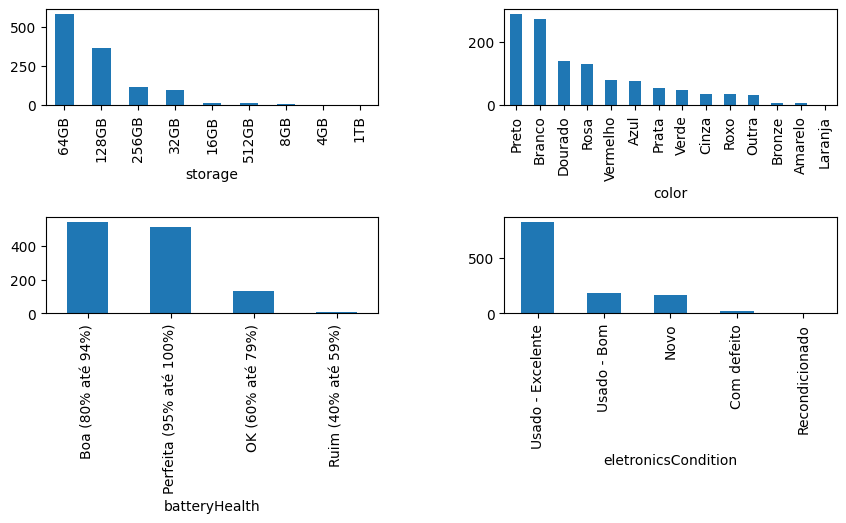

In [248]:
columns = ['eletronicsModel', 'storage', 'color', 'batteryHealth', 'eletronicsCondition']

#
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
fig.tight_layout(pad=6)

df.storage.value_counts().plot(kind='bar', ax=axes[0, 0])
df.color.value_counts().plot(kind='bar', ax=axes[0, 1])
df.batteryHealth.value_counts().plot(kind='bar', ax=axes[1, 0])
df.eletronicsCondition.value_counts().plot(kind='bar', ax=axes[1, 1])

#### Média

A maior parte das colunas do nosso _dataset_ têm natureza categórica. As colunas que possuem de fato uma interpretação numérica são: `price`, `pictures` (número de imagens no anúncio) e `subjectLength` (comprimento do  título do anúncio). Ainda assim elas tem escalas bem diferentes. Faz mais sentido agrupar os dados pelo modelo do produto.

In [107]:
df[['price', 'pictures', 'subjectLength']].mean()

price            2212.445280
pictures            0.690476
subjectLength      21.519632
dtype: float64

In [255]:
g_model = df.groupby(['eletronicsModel'])
g_storage = df.groupby(['storage'])
g_color = df.groupby(['color'])

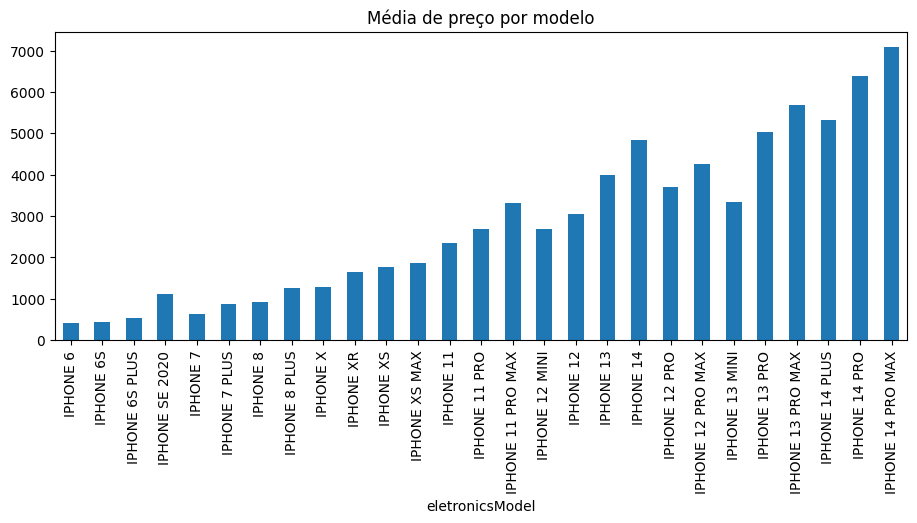

In [256]:
_ = g_model[['price', 'modelOrder']].mean().sort_values(['modelOrder'])['price'] \
    .plot(kind='bar', figsize=(11,4), title='Média de preço por modelo')

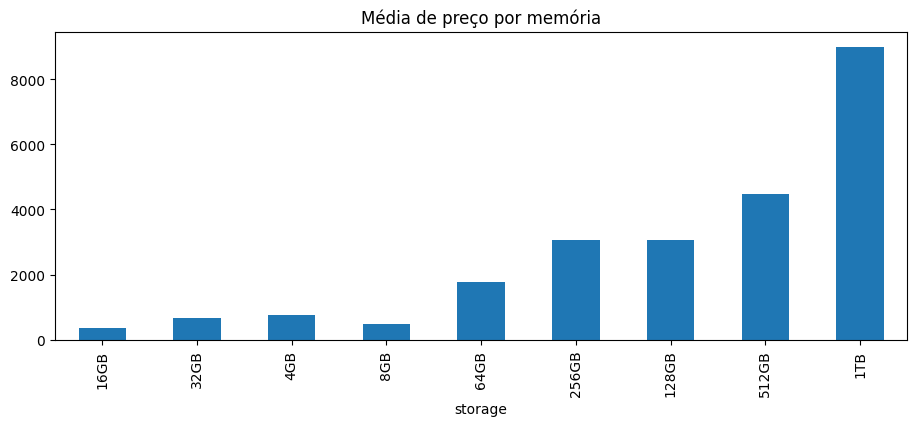

In [257]:
_ = g_storage[['price', 'modelOrder']].mean().sort_values(['modelOrder'])['price'] \
    .plot(kind='bar', figsize=(11,4), title='Média de preço por memória')

In [258]:
print(f'Número de anúncios de 1TB: {(df.storage == "1TB").sum()}')

Número de anúncios de 1TB: 1


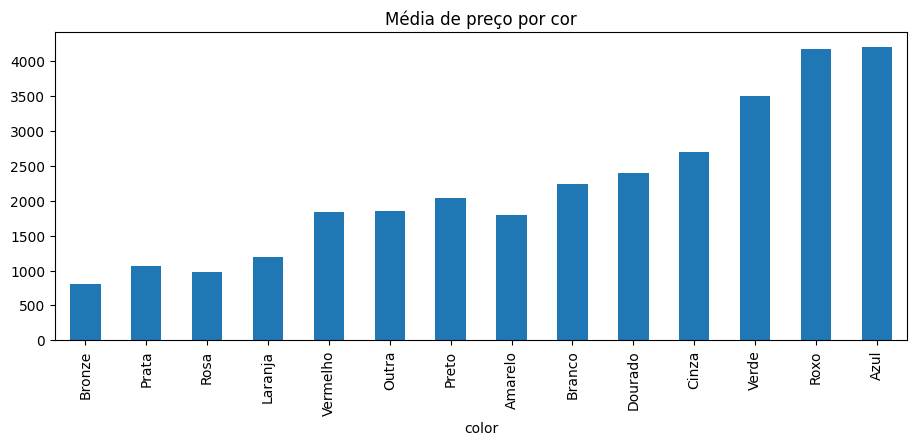

In [259]:
_ = g_color[['price', 'modelOrder']].mean().sort_values(['modelOrder'])['price'] \
    .plot(kind='bar', figsize=(11,4), title='Média de preço por cor')

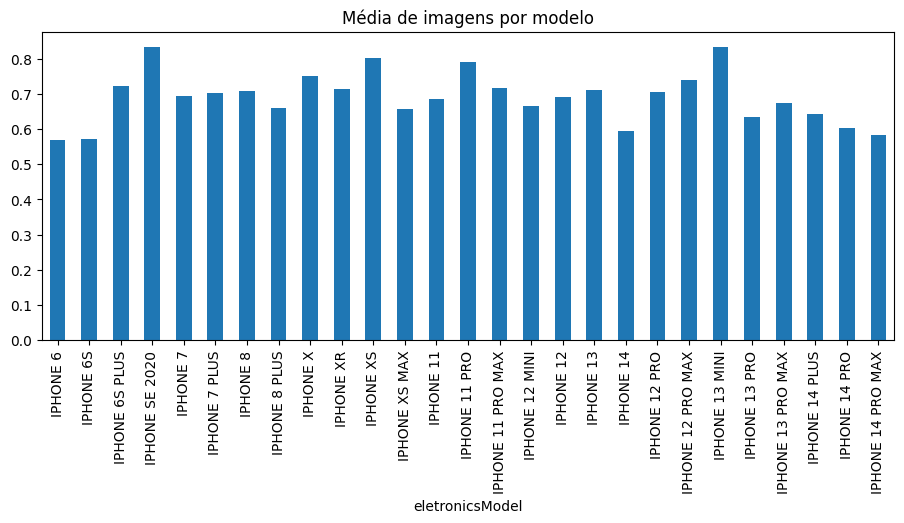

In [260]:
# Sem padrão aparente
_ = g_model[['pictures', 'modelOrder']].mean().sort_values(['modelOrder'])['pictures'] \
    .plot(kind='bar', figsize=(11,4), title='Média de imagens por modelo')

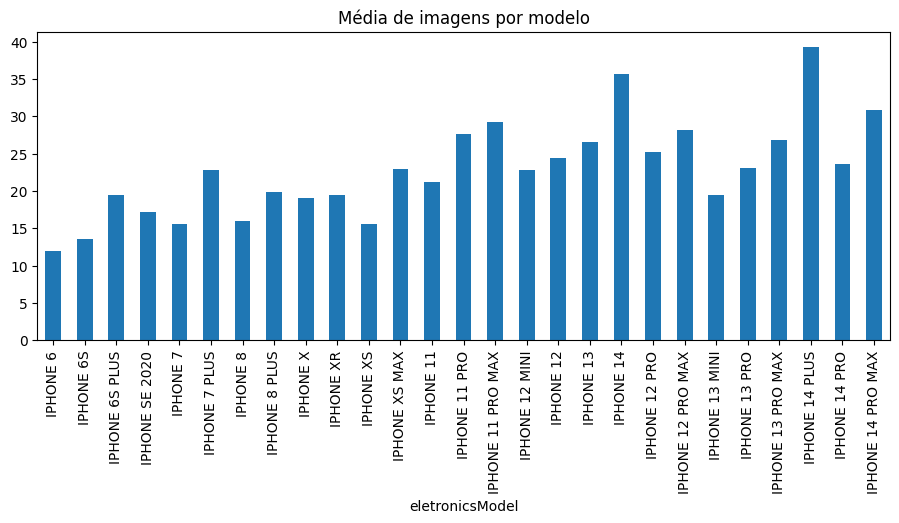

In [261]:
# Leve tendência ascendente ou lateralizada
_ = g_model[['subjectLength', 'modelOrder']].mean().sort_values(['modelOrder'])['subjectLength'] \
    .plot(kind='bar', figsize=(11,4), title='Média de imagens por modelo')

### Medidas de Variabilidade

3500000.0


### Tabela de Frequência e Histograma

### Boxplot

### QQ-Plot

### Correlações

### Teste de Normalidade

### Best Fit Distribution 